In [1]:
from tensorflow.keras.models import load_model 
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import cv2
import numpy as np

In [2]:
model = load_model('Mask_Detection_model.h5')

In [3]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

**Check the prediction using live cam.**

In [ ]:
faceClassifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cam = cv2.VideoCapture(0)
while True:
    _,img = cam.read()
    greyImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceClassifier.detectMultiScale(greyImg, 1.3, 5)
    cv2.imshow('Mask detection', img)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (224,224))
        face = img_to_array(face)
        face = np.expand_dims(face, axis=0)
        face = preprocess_input(face)
                
        mask, no_mask = model.predict(face)[0]
        if mask > no_mask:
            print('*****Mask Detected......%%%')
        else:
            print('No Mask...........')
            
        if cv2.waitKey(1) == 13:
            break
cam.release()
cv2.destroyAllWindows()

*****Mask Detected......%%%


**Returns an images of mask and no mask in prediction.**

In [ ]:
faceClassifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cam = cv2.VideoCapture(0)
while True:
    _,img = cam.read()
    greyImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceClassifier.detectMultiScale(greyImg, 1.3, 5)
#     cv2.imshow('Mask detection', img)
    for (x,y,w,h) in faces:
#         cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (224,224)) 
        face = img_to_array(face)
        face = np.expand_dims(face, axis=0)
        face = preprocess_input(face)
                
        mask, no_mask = model.predict(face)[0]
        myFace = ""
        if mask > no_mask:
            myFace = cv2.imread('mask.jpg')
            
        else:
            myFace = cv2.imread('nomask.jpg')
        
        myFace = cv2.resize(myFace, (400,400))
        cv2.imshow('myface', myFace)
        img = cv2.resize(img, (700,400))
        cv2.imshow('image', img)          
        
        if cv2.waitKey(1) == 13:
            break
cam.release()
cv2.destroyAllWindows()


**Check the model from mobile camera.**

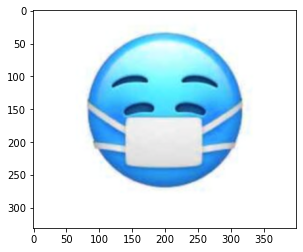

In [18]:
am = cv2.VideoCapture("http://192.168.43.1:8080/video")
while True:
    _, img = cam.read()
    
    img = cv2.resize(img, (700, 400))
    cv2.imshow("Face", img)
    if cv2.waitKey(1) == 13:
        break